# Milestones 1

## Content

1. Introduction
2. Business Understanding
        2.1. Background
        2.2. Problem Statement
        2.3. Problem Description
3. Import Libraries
4. Data Loading
        3.1 Data Description
5. Data Cleaning
        4.1 Missing Values
        4.2 Column Manipulation
6. Data Exploration
7. Analysis And Calculation
8. Conclusion

##  1. Introduction 

#### Name : Abdurrahman Shiddiq Thaha
#### Batch : FTDS 001_HCK

## 2. Business Understanding

### 2.1 Background

![alt text](https://github.com/acothaha/github-slideshow/blob/master/picture/marijuana-dispensary-products-illustration-1200x630-1085450290.jpg?raw=true)

You are a data analyst in We Eternally Exist in Dreamland (WEED), a company that focus on selling various cannabis products for recreation purposes with a specific market of African American people. WEED is just trying to expand their market to The USA and you are asked by the WEED's managament to give your analysis and suggestion on which state they should open their new store in.

There a lot of things to consider in this business, but the elephant in the room is the regulation of cannabis in each state which differs from one to another. So your analysis and suggestion in this project is very crucial.


### 1.2 Problem Statement

<h2 style="font-size:20;text-align:center;margin:50px">The management needs to expand the market by deciding on the best state(s) that will be chosen to build a new store in the next 4 months.</h2>

### 1.3 Problem Description

Based on the problem statement, we will do problem statement with 5W + 1H method:

- What is the legality of cannabis for each state?
- What is the mean, median and mode price of cannabis in the USA?
- Where and how much is the most expensive and cheapest price of cannabis in The USA?
- Is there any correlation between cannabis price and it's legality?
- Which State has the highest population and per capita income?
- Where is the state with highest cannabis consumption percentage?
- What is the percentage of each race in The USA, and which state has the highest black percentage?



## 3. Import Libraries 

These are libraries that are used in this assignment:

- pandas : Used to load data and analyze data

- numpy : Used to do mathematical calculation necessary in the data analysis

- matplotlib : Used to visualize data

- seaborn : Used to do an alternative data visualization

- scipy.stats : Used to do statistical calculation

- warnings : Used to ignore any warning

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st

import warnings
warnings.simplefilter('ignore')

# enable inline plotting
%matplotlib inline

## 4. Data Loading 

We have been provided with 2 dataset from **[here (weed and regulation)](https://www.kaggle.com/datasets/igorbeketov/weed-pricing-us-2022)** and **[here (usage)](https://data.world/samhsa/marijuana-use-in-past-year)**. A description for what the datasets contain is given below:


- **weed.csv** : Information about states and cannabis' price
- **regulations.csv** : Information about regulation of each state
- **usage.csv** : Information about cannabis comsumption (in %) in each state

In [2]:
df_cannabis = pd.read_csv('data/weed.csv')
df_regulations = pd.read_csv('data/regulations.csv')
df_usage = pd.read_excel('data/usage.xlsx')

In [3]:
df_cannabis.head(2)

,state,state_s,highQ_price_ounce,medQ_price_ounce,total_population,percent_white,percent_black,percent_asian,percent_hispanic,per_capita_income,median_rent,median_age
0,Alabama,AL,341,230,4799277,67,26,1,4,23680,501,38.1
1,Alaska,AK,303,270,720316,63,3,5,6,32651,978,33.6


In [4]:
df_regulations.head(2)

,state,legality,medicinal,decriminalized
0,Alabama,Fully Illegal,False,False
1,Alaska,Fully Legal,True,True


In [5]:
df_usage.head(2)

,Order,State,Substate Region,Small Area Estimate
0,1,Total United States,Total United States,0.126451
1,2,Northeast,Northeast,0.137420


#### Merging Data

In [6]:
# grouping data by state

df_usage = df_usage.groupby('State')['Small Area Estimate'].mean()

In [7]:
# merging df_cannabis and df_regulation

df = pd.merge(df_cannabis, df_regulations, left_on='state', right_on='state', how='inner')

In [8]:
# merging df_cannabis and df_regulation

df = pd.merge(df, df_usage, left_on='state', right_on='State', how='inner')

### 4.1 Data Description

| Variable | Definition | 
| --- | --- |
| state | US state | 
| state_s | Postal abbreviation for state |
| highQ_price_ounce | high quality cannabis price per ounce (in USD) | 
| medQ_price_ounce | Medium quality cannabis price per ounce (in USD) |
| percent_white | Percentage of Caucasian |
| percent_black | Percentage of African American |
| percent_asian | Percentage of Asian | 
| percent_hispanic | Percentage of Hisppanic |
| per_capita_income | Income per Capita (in USD) | 
| median_rent | Rent median (in USD) | 
| median_age | Age median | 
| legality | Regulations in each US state As for August 10, 2022 |
| medicinal | Is medical cannabis legal? |
| legality | Is recreational cannabis decriminalized? |
| Small Area Estimate | Estimation on cannabis consumption (in %) |

In [9]:
df.shape

(51, 16)

This dataset has 51 rows and 16 columns

In [10]:
df.head()

,state,state_s,highQ_price_ounce,medQ_price_ounce,total_population,percent_white,percent_black,percent_asian,percent_hispanic,per_capita_income,median_rent,median_age,legality,medicinal,decriminalized,Small Area Estimate
0,Alabama,AL,341,230,4799277,67,26,1,4,23680,501,38.1,Fully Illegal,False,False,0.096908
1,Alaska,AK,303,270,720316,63,3,5,6,32651,978,33.6,Fully Legal,True,True,0.203026
2,Arizona,AZ,296,232,6479703,57,4,3,30,25358,747,36.3,Fully Legal,True,True,0.129568
3,Arkansas,AR,329,240,2933369,74,15,1,7,22170,480,37.5,Medical,True,False,0.102797
4,California,CA,258,209,37659181,40,6,13,38,29527,1119,35.4,Fully Legal,True,True,0.146901


In [11]:
df.tail()

,state,state_s,highQ_price_ounce,medQ_price_ounce,total_population,percent_white,percent_black,percent_asian,percent_hispanic,per_capita_income,median_rent,median_age,legality,medicinal,decriminalized,Small Area Estimate
46,Virginia,VA,363,288,8100653,64,19,6,8,33493,910,37.5,Fully Legal,True,True,0.127028
47,Washington,WA,233,197,6819579,72,3,7,11,30742,853,37.3,Fully Legal,True,True,0.179740
48,West Virginia,WV,361,255,1853619,93,3,1,1,22966,448,41.5,Medical,True,False,0.102619
49,Wisconsin,WI,342,287,5706871,83,6,2,6,27523,636,38.7,Medical,False,False,0.114482
50,Wyoming,WY,315,320,570134,85,1,1,9,28902,647,36.8,Fully Illegal,False,False,0.107533


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51 entries, 0 to 50
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   state                51 non-null     object 
 1   state_s              51 non-null     object 
 2   highQ_price_ounce    51 non-null     int64  
 3   medQ_price_ounce     51 non-null     int64  
 4   total_population     51 non-null     int64  
 5   percent_white        51 non-null     int64  
 6   percent_black        51 non-null     int64  
 7   percent_asian        51 non-null     int64  
 8   percent_hispanic     51 non-null     int64  
 9   per_capita_income    51 non-null     int64  
 10  median_rent          51 non-null     int64  
 11  median_age           51 non-null     float64
 12  legality             51 non-null     object 
 13  medicinal            51 non-null     bool   
 14  decriminalized       51 non-null     bool   
 15  Small Area Estimate  51 non-null     float

- there are no column that have null values
- there are 3 columns with object datatype, 9 columns with int64 datatype, 2 column with float64 datatype and 2 columns with bool datatype

## 5. Data Cleaning 

### 5.1 Missing Values 

In [13]:
df.isnull().sum().sort_values(ascending=False)

state                  0
state_s                0
highQ_price_ounce      0
medQ_price_ounce       0
total_population       0
percent_white          0
percent_black          0
percent_asian          0
percent_hispanic       0
per_capita_income      0
median_rent            0
median_age             0
legality               0
medicinal              0
decriminalized         0
Small Area Estimate    0
dtype: int64

there is no null values in the dataset


#### Checking categorical data if they have non-standard missing values

In [14]:
df['state'].value_counts()

Alabama                 1
Pennsylvania            1
Nevada                  1
New Hampshire           1
New Jersey              1
New Mexico              1
New York                1
North Carolina          1
North Dakota            1
Ohio                    1
Oklahoma                1
Oregon                  1
Rhode Island            1
Montana                 1
South Carolina          1
South Dakota            1
Tennessee               1
Texas                   1
Utah                    1
Vermont                 1
Virginia                1
Washington              1
West Virginia           1
Wisconsin               1
Nebraska                1
Missouri                1
Alaska                  1
Idaho                   1
Arizona                 1
Arkansas                1
California              1
Colorado                1
Connecticut             1
Delaware                1
District of Columbia    1
Florida                 1
Georgia                 1
Hawaii                  1
Illinois    

In this categorical column there is no non-standard missing values so we will just leave it as it is

In [15]:
df['legality'].value_counts()

Medical          29
Fully Legal      16
Fully Illegal     6
Name: legality, dtype: int64

Same as previous one, In this categorical column there is no non-standard missing values so we will just leave it as it is

#### Since there is no missing values at all, we will not do any missing values handling

### 5.2 Column Manipulation

#### Changing column's name
- `Small Area Estimate` -> `usage_percentage`

In [16]:
df.rename(columns = {'Small Area Estimate':'usage_percentage'}, inplace=True)

#### Changing column's datatype
- `medicinal`: bool -> object (legal/illegal)
- `decriminalized`: bool -> object (yes/no)

In [17]:
df['medicinal'] = df['medicinal'].replace({True: 'legal', False: 'illegal'})

In [18]:
df['decriminalized'] = df['decriminalized'].replace({True: 'yes', False: 'no'})

#### Dropping unnecessary column(s)
- `state_s`: we already have `state` to differentiate each state
- `median_age` & `median_rent` : age and rent will not be used in this analysis

In [19]:
df.drop(columns=['state_s', 'median_age', 'median_rent'], inplace=True)

#### Adding new column(s)

In [20]:
df['price_average_ounce'] = (df['highQ_price_ounce'] + df['medQ_price_ounce']) / 2

In [21]:
df.head(3)

,state,highQ_price_ounce,medQ_price_ounce,total_population,percent_white,percent_black,percent_asian,percent_hispanic,per_capita_income,legality,medicinal,decriminalized,usage_percentage,price_average_ounce
0,Alabama,341,230,4799277,67,26,1,4,23680,Fully Illegal,illegal,no,0.096908,285.5
1,Alaska,303,270,720316,63,3,5,6,32651,Fully Legal,legal,yes,0.203026,286.5
2,Arizona,296,232,6479703,57,4,3,30,25358,Fully Legal,legal,yes,0.129568,264.0


In [22]:
df.shape

(51, 14)

after adding and dropping columns, we are left with a dataframe with 51 rows and 14 columns

## 6. Data Exploration 

There are 2 datatypes in the dataset:

1. Categorical : `legality`, `medicinal` & `decriminalized`
2. Numerical : `highQ_price_ounce`, `medQ_price_ounce`, `total_population`, `per_capita_income`, `price_average_ounce`, `percent_white`, `percent_black`, `percent_asian`, `percent_hispanic` & `usage_percentage`

For each datatype, we will do different data exploration

### • Categorical 

In [23]:
cat_column = ['legality', 'medicinal', 'decriminalized']

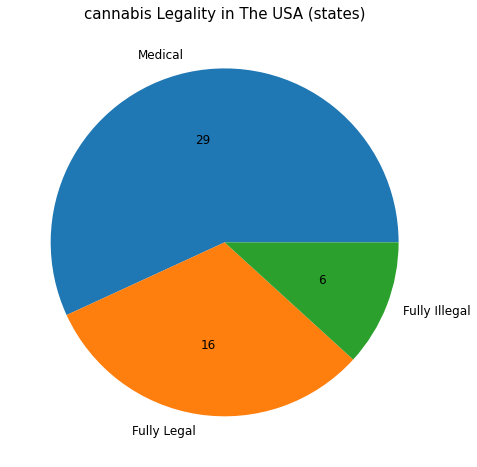

In [24]:
fig, axes = plt.subplots(figsize=(8,8))

values=df['legality'].value_counts()

_ = df['legality'].value_counts().sort_values(ascending=False).plot(kind='pie', ax=axes, fontsize=12, autopct=lambda x: '{:.0f}'.format(x*values.sum()/100))
_ = axes.set_ylabel('')
_ = axes.set_title('cannabis Legality in The USA (states)', fontsize=15)

In The USA, There are **29** states that legalize cannabis for medical purposes, **16** states that fully legalize it, and it is still fully illegal in the rest **6** states.

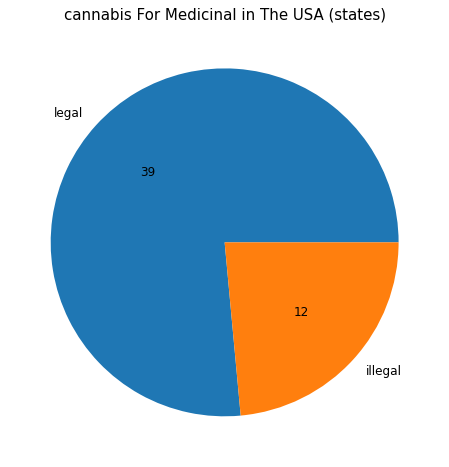

In [25]:
fig, axes = plt.subplots(figsize=(8,8))

values=df['medicinal'].value_counts()

_ = df['medicinal'].value_counts().sort_values(ascending=False).plot(kind='pie', ax=axes, fontsize=12, autopct=lambda x: '{:.0f}'.format(x*values.sum()/100))
_ = axes.set_ylabel('')
_ = axes.set_title('cannabis For Medicinal in The USA (states)', fontsize=15)
    

In The USA, There are **39** states that legalize cannabis for medical purposes, **16** states that fully legalize it, and it is still fully illegal in the rest **6** states.

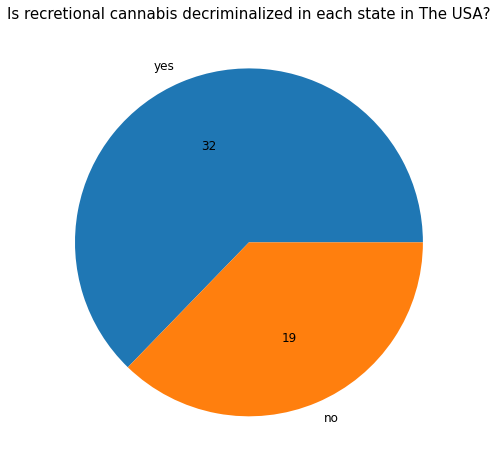

In [26]:
fig, axes = plt.subplots(figsize=(8,8))

values=df['decriminalized'].value_counts()

_ = df['decriminalized'].value_counts().sort_values(ascending=False).plot(kind='pie', ax=axes, fontsize=12, autopct=lambda x: '{:.0f}'.format(x*values.sum()/100))
_ = axes.set_ylabel('')
_ = axes.set_title('Is recretional cannabis decriminalized in each state in The USA?', fontsize=15)
    

In The USA, There are **32** states that decriminalize cannabis for recretional purposes, **19** states that still haven't decriminalized recretional cannabis.

### • Numerical 

In [27]:
num_column = ['highQ_price_ounce', 'medQ_price_ounce', 'total_population', 'per_capita_income', 'price_average_ounce', 'percent_white', 'percent_black', 'percent_asian', 'percent_hispanic', 'usage_percentage']

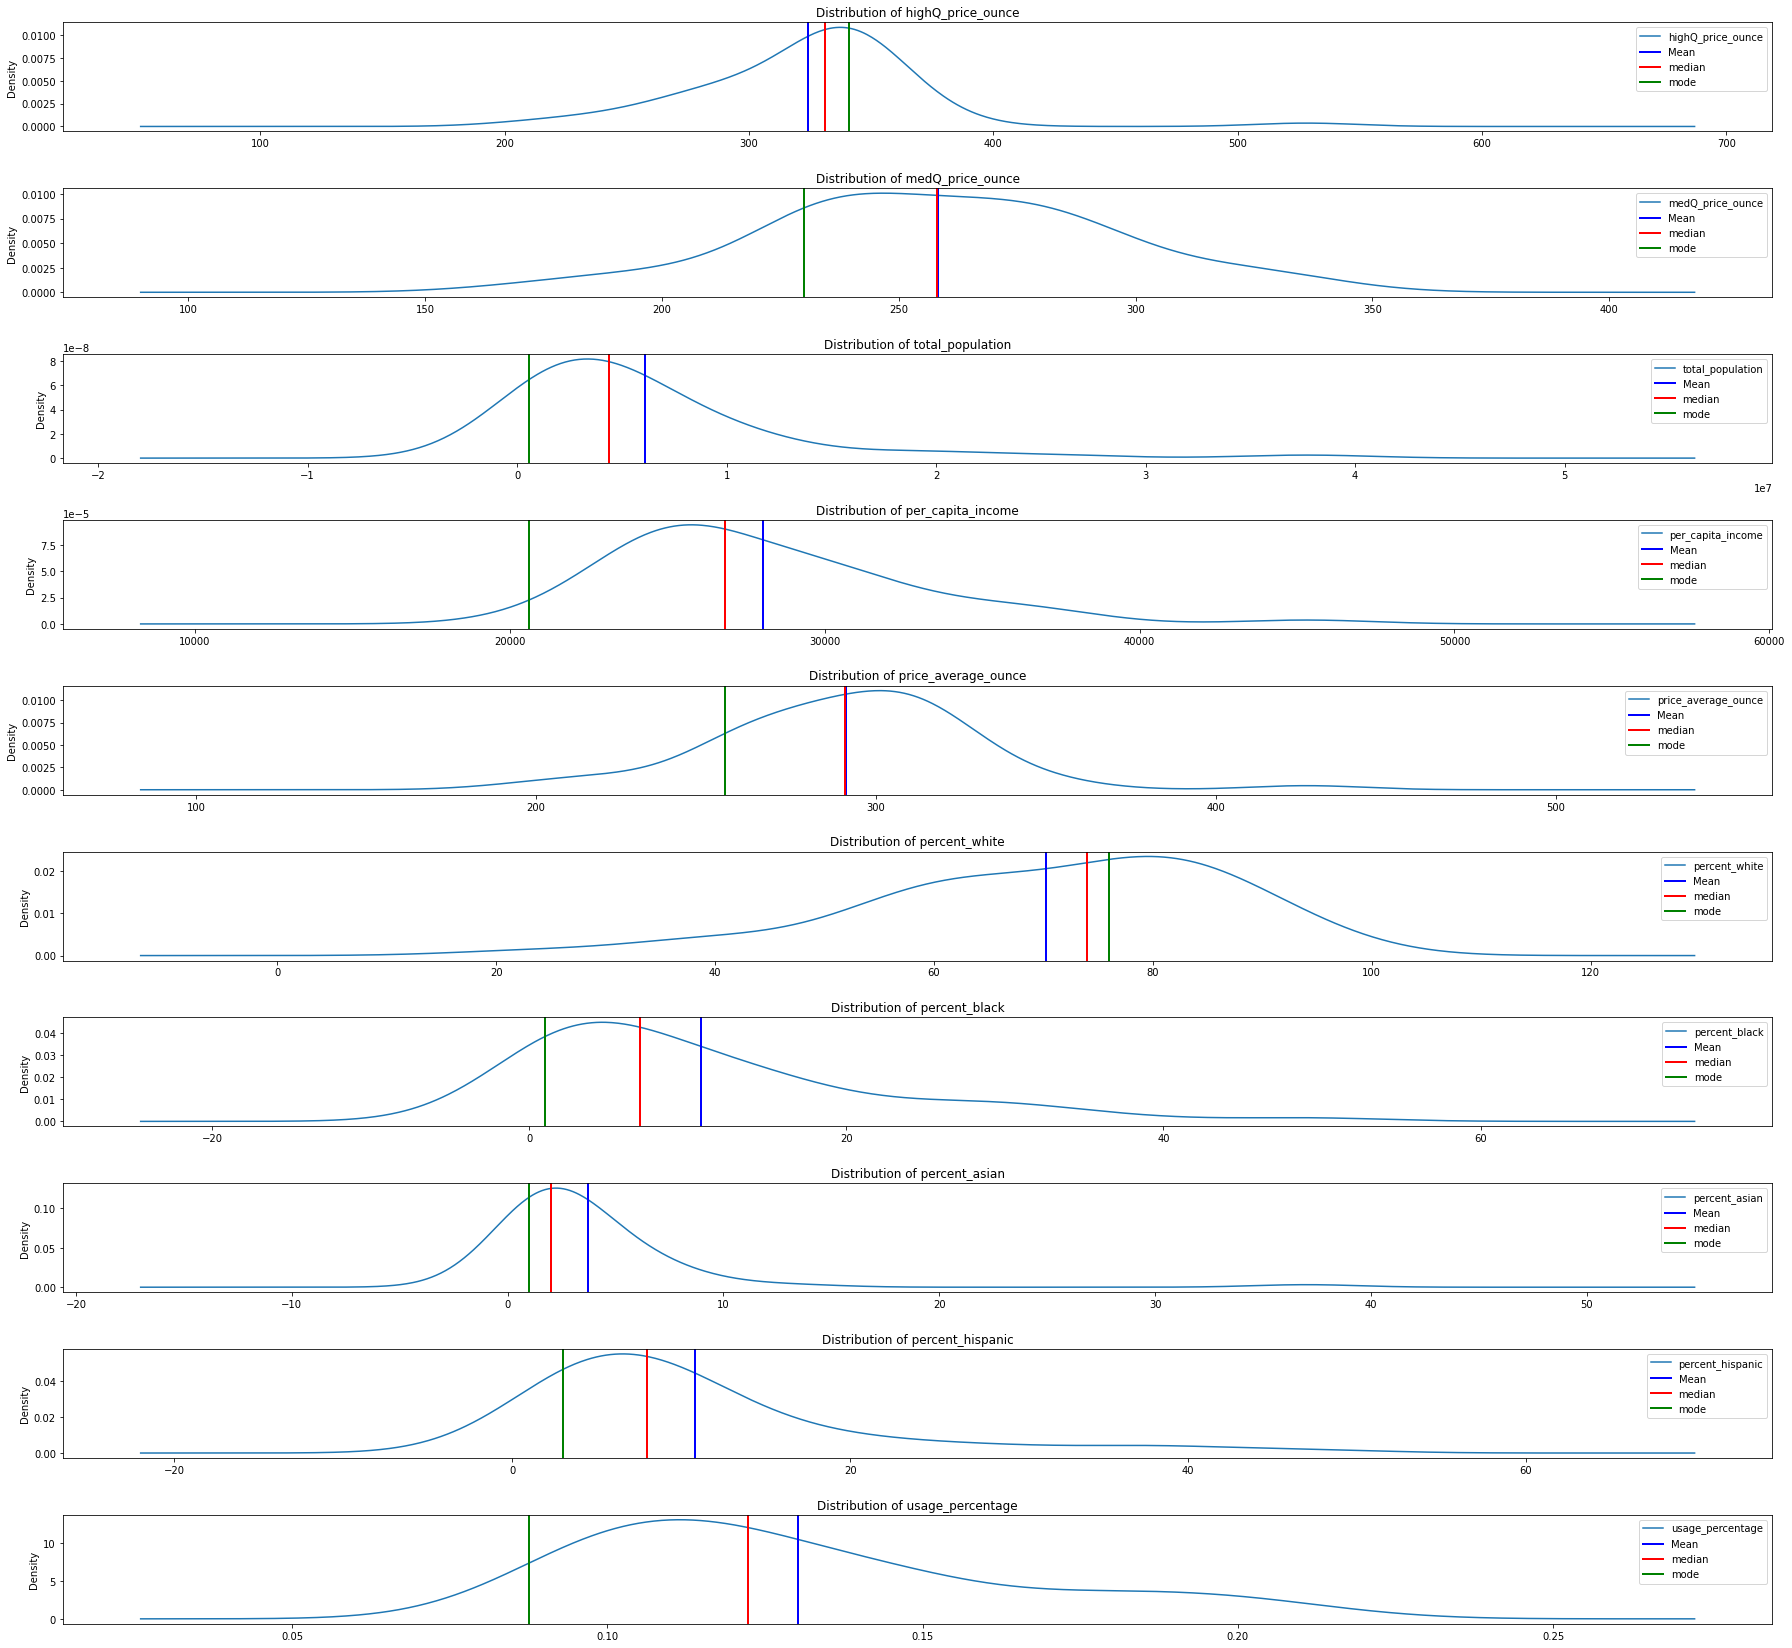

In [28]:
fig, axes = plt.subplots(10, 1, figsize=(25, 23))
for c, ax in zip(num_column, axes):
    _ = df[[c]].plot(kind='kde', ax=ax)
    mean = df[c].mean()
    median = df[c].median()
    mode = df[c].mode()[0]
    ax.axvline(mean, color='blue', linewidth=2, label=f'Mean');
    ax.axvline(median, color='red', linewidth=2, label=f'median');
    ax.axvline(mode, color='green', linewidth=2, label=f'mode');
    ax.set_title(f'Distribution of {c}')
    ax.legend();
    
plt.tight_layout()

Based on the figures above. overall, we can see that the distribution for all numerical columns seems normal-like although there are some columns that skew to the left or right but it's not too extreme. Their mean and median are also quite similar which represent a normal distribution. About mode of each column, since number of rows is not a lot so there is no useful information that we can get from mode.

## 7. Analysis And Calculation
In this section we will try to answer problem descriptions

### • What is the legality of cannabis for each state?

![alt text](https://github.com/acothaha/github-slideshow/blob/master/picture/Capture.PNG?raw=true)


- There are **16** states that are fully legalize cannabis for medical and recreation. the list of state can be seen below.
- There are **29** states that are legalize cannabis for medical purposes. the list of state can be seen below.
- There are **6** states that have not legalized cannabis yet. the list of state can be seen below.

#### Fully Legal

In [29]:
fully_legal = df.loc[df['legality'] == 'Fully Legal', 'state']

print('state that fully legalize cannabis')
for n, s in enumerate(fully_legal):
    print(f'{n+1}. {s}')

state that fully legalize cannabis
1. Alaska
2. Arizona
3. California
4. Colorado
5. District of Columbia
6. Illinois
7. Maine
8. Massachusetts
9. Michigan
10. Montana
11. Nevada
12. New Jersey
13. Oregon
14. Vermont
15. Virginia
16. Washington


#### Medically Legal

In [30]:
medical_legal = df.loc[df['legality'] == 'Medical', 'state']

print('state that medically legalize cannabis')
for n, s in enumerate(medical_legal):
    print(f'{n+1}. {s}')

state that medically legalize cannabis
1. Arkansas
2. Connecticut
3. Delaware
4. Florida
5. Georgia
6. Hawaii
7. Indiana
8. Iowa
9. Kansas
10. Kentucky
11. Louisiana
12. Maryland
13. Minnesota
14. Mississippi
15. Missouri
16. Nebraska
17. New Hampshire
18. New Mexico
19. New York
20. North Carolina
21. North Dakota
22. Ohio
23. Oklahoma
24. Pennsylvania
25. Rhode Island
26. Texas
27. Utah
28. West Virginia
29. Wisconsin


#### Fully Illegal

In [31]:
fully_illegal = df.loc[df['legality'] == 'Fully Illegal', 'state']

print('state that fully not legalize cannabis')
for n, s in enumerate(fully_illegal):
    print(f'{n+1}. {s}')

state that fully not legalize cannabis
1. Alabama
2. Idaho
3. South Carolina
4. South Dakota
5. Tennessee
6. Wyoming


### • What is the mean, median and mode price of cannabis in the USA?

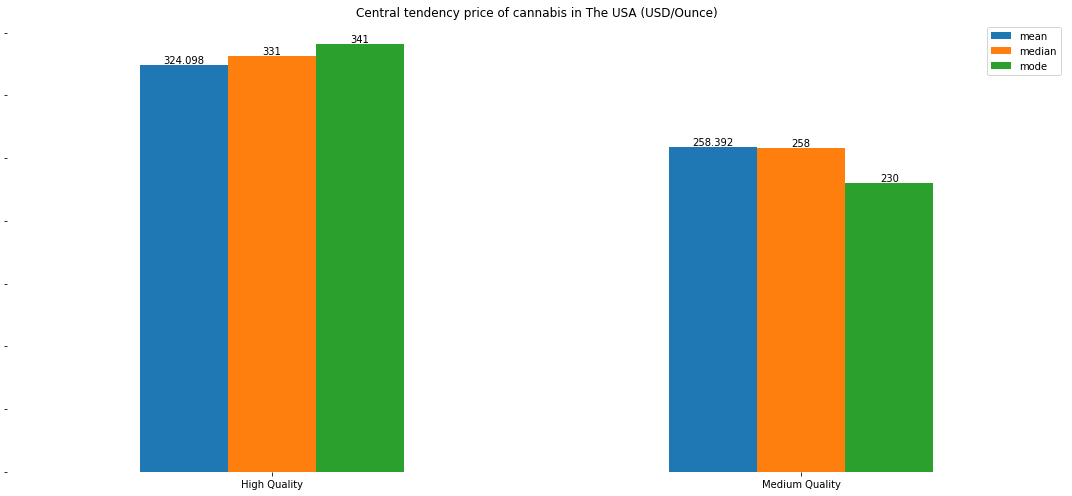

In [32]:
mean_val = []
median_val = []
mode_val = []

for c in ['highQ_price_ounce', 'medQ_price_ounce']:
    mean_val.append(df[c].mean())
    median_val.append(df[c].median())
    mode_val.append(df[c].mode()[0])
    
df_central = pd.DataFrame()
df_central['mean'] = mean_val
df_central['median'] = median_val
df_central['mode'] = mode_val

labels = ['High Quality', 'Medium Quality']

_ = df_central.plot(kind='bar', figsize=(15,7))

_.bar_label(_.containers[0]);
_.bar_label(_.containers[1]);
_.bar_label(_.containers[2]);
_.set_xticklabels(labels, rotation=0);
_.set_frame_on(False)
_.set_yticklabels('')
_.set_title('Central tendency price of cannabis in The USA (USD/Ounce)');
plt.tight_layout()

At a glance, there is no big difference between mean, median and mode for both of the cannabis quality price.

For the High Quality cannabis, the average price is USD **324.098** per ounce with median of USD **331** per ounce and the most most common price of USD **341** per ounce.

On the other hand, medium quality cannabis has the the average price of USD **258.392** per ounce with median of USD **258** per ounce and the most most common price of USD **239** per ounce

### • Where and how much is the most expensive and cheapest price of cannabis in The USA?

In [33]:
min_high = df.loc[df['highQ_price_ounce'] == df['highQ_price_ounce'].min(), 'state']
max_high = df.loc[df['highQ_price_ounce'] == df['highQ_price_ounce'].max(), 'state']

print(f'The most expensive high quality cannabis is in {max_high.iloc[0]} and the cheapest one is in {min_high.iloc[0]}')

min_med = df.loc[df['medQ_price_ounce'] == df['medQ_price_ounce'].min(), 'state']
max_med = df.loc[df['medQ_price_ounce'] == df['medQ_price_ounce'].max(), 'state']

print(f'The most expensive medium quality cannabis is in {max_med.iloc[0]} and the cheapest one is in {min_med.iloc[0]}')

The most expensive high quality cannabis is in District of Columbia and the cheapest one is in Oregon
The most expensive medium quality cannabis is in South Dakota and the cheapest one is in Mississippi


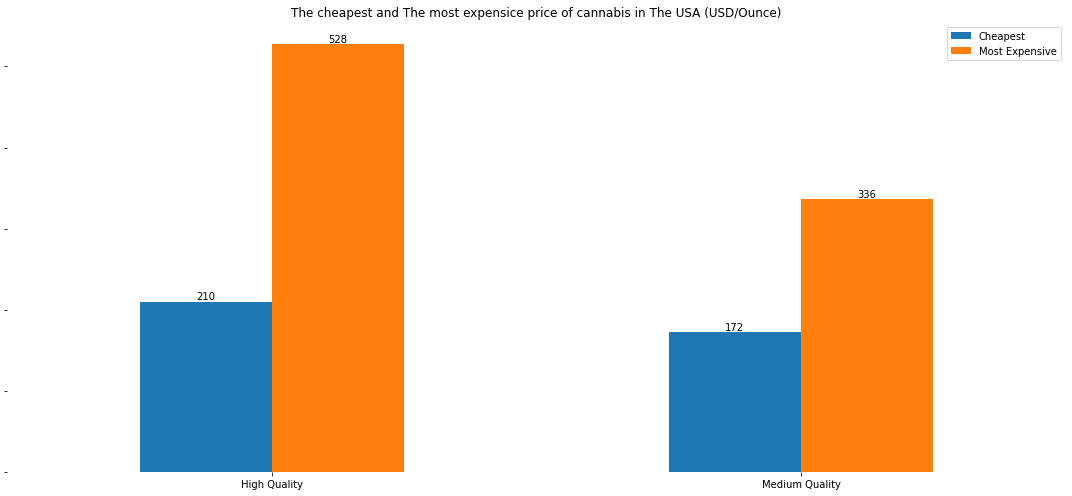

In [34]:
min_val = []
max_val = []

for c in ['highQ_price_ounce', 'medQ_price_ounce']:
    min_val.append(df[c].min())
    max_val.append(df[c].max())
    
df_test = pd.DataFrame()
df_test['Cheapest'] = min_val
df_test['Most Expensive'] = max_val

labels = ['High Quality', 'Medium Quality']

_ = df_test.plot(kind='bar', figsize=(15,7))

_.bar_label(_.containers[0]);
_.bar_label(_.containers[1]);
_.set_xticklabels(labels, rotation=0);
_.set_title('The cheapest and The most expensice price of cannabis in The USA (USD/Ounce)');
_.set_frame_on(False)
_.set_yticklabels('')
plt.tight_layout()

There are a huge range of price for high quality cannabis in The USA. Being the most expensive price is USD **528** per ounce which is in `District of Columbia` and the cheapest one is USD **210** per ounce which is in `Oregon`. In opposition, the range of price for medium quality cannabis in The USA is not really great, in `South Dakota` with USD **336** per ounce for the most expensive and in `Mississippi` with USD **172** per ounce for the cheapest.

### • Is there any correlation between cannabis price and it's legality?

We will do a hypothesis test analysis to know if there is any correlation between cannabis price and it's legality. In order to know the correlation between those two, we will use `ANOVA`.

Our hypothesis on this case:

* H0: The cannabis price and it's legality are not correlated with each other
* H1: The cannabis price and it's legality are correlated with each other

note : confidence level : **95%** / Critical Value : 1 - 0.95 = **0.05**

In [35]:
# Finding out the cannabis price data for each legality as a list
CategoryGroupLists=df.groupby('legality')['price_average_ounce'].apply(list)

# Performing ANOVA test
f_stat,p_value = st.f_oneway(*CategoryGroupLists)

print('P-value:',p_value)

P-value: 0.3213964269890935


Based on the result above, we can see that P-value = **0.32139** is bigger than our critical value = **0.05**, so we can conclude that **we fail to reject the null hypothesis**, hence there is no correlation between cannabis price and it's legality.

### • Which State has the highest population and per capita income?

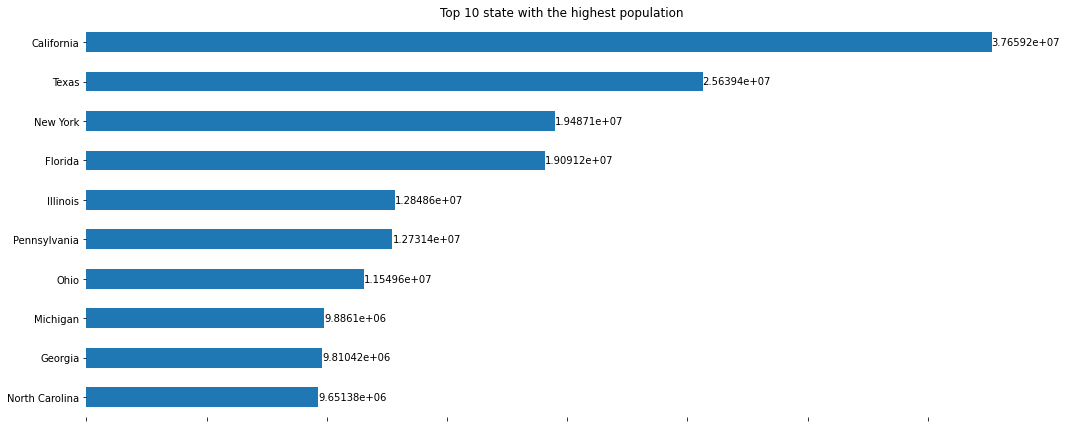

In [36]:
_ = df.groupby('state')['total_population'].sum().sort_values(ascending=True)[-10:].plot(kind='barh', figsize=(15,6))
_.bar_label(_.containers[0]);
_.tick_params(axis='x', rotation=0)
_.set_title('Top 10 state with the highest population');
_.set_frame_on(False)
_.set_xticklabels('')
_.set_ylabel('')
plt.tight_layout()


`California` is the state with the highest population (**37.6** mil people), placed at the second one with a huge margin is `Texas` (**25.6** mil people) and at the third one, placed closely together are the `New York` (**19.4** mil people) and `Florida` (**19.0** mil people). 

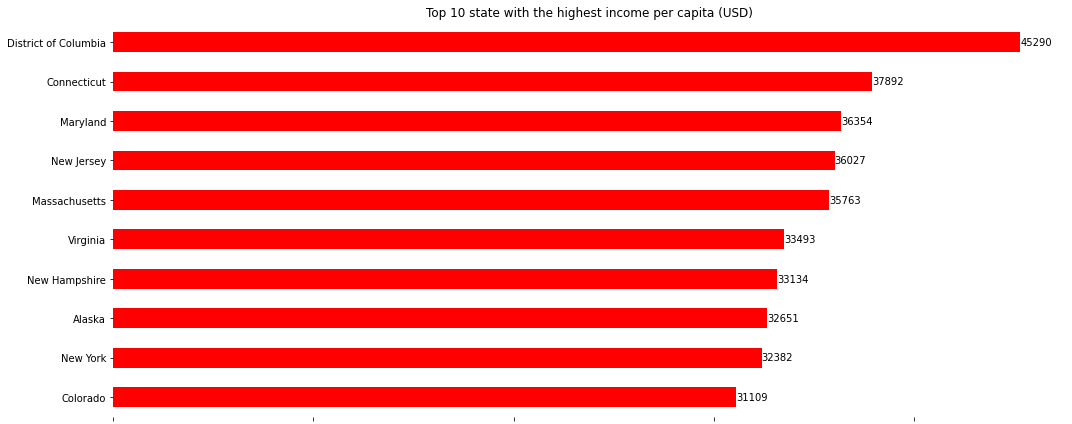

In [37]:
_ = df.groupby('state')['per_capita_income'].sum().sort_values(ascending=True)[-10:].plot(kind='barh', figsize=(15,6), color='red')
_.bar_label(_.containers[0]);
_.tick_params(axis='x', rotation=0)
_.set_title('Top 10 state with the highest income per capita (USD)');
_.set_frame_on(False)
_.set_xticklabels('')
_.set_ylabel('')
plt.tight_layout()

The state with the highest income per capita is `District of Columbia` with USD **45290** per capita, followed by `Connecticut` with USD **37892** per capita and the third one is `Maryland` with USD **36027** per capita

### • Where is the state with highest cannabis consumption percentage?

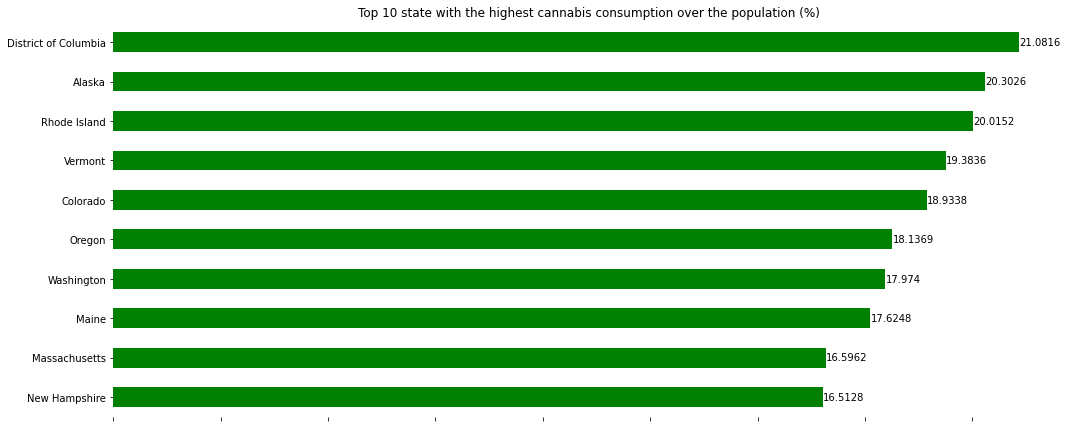

In [38]:
_ = (df.groupby('state')['usage_percentage'].sum().sort_values(ascending=True)[-10:]*100).plot(kind='barh', figsize=(15,6), color='green')
_.bar_label(_.containers[0]);
_.tick_params(axis='x', rotation=0)
_.set_title('Top 10 state with the highest cannabis consumption over the population (%)');
_.set_frame_on(False)
_.set_xticklabels('')
_.set_ylabel('')
plt.tight_layout()

It's quite fascinating that the state with the highest cannabis consumption is `District of Columbia` with **21.08**%, and the second and third are `Alaska` with **20.3**% and `Rhode Island` with **20.01**%

### • What is the percentage of each race in The USA, and which state has the highest black percentage?

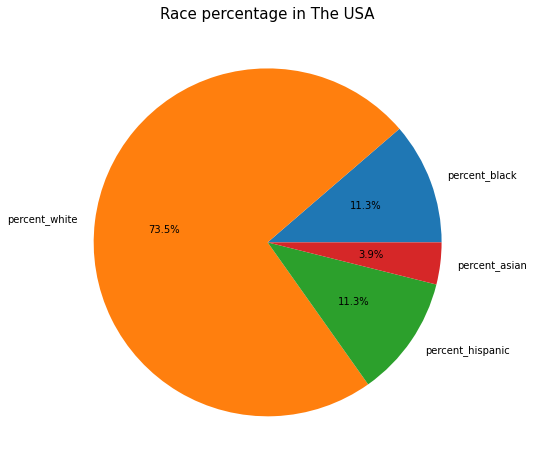

In [39]:
fig, axes = plt.subplots(figsize=(8,8))
_ = df[['percent_black', 'percent_white', 'percent_hispanic', 'percent_asian']].mean().plot(kind='pie', autopct='%1.1f%%')
_ = axes.set_ylabel('')
_ = axes.set_title('Race percentage in The USA', fontsize=15)

Unsuprisingly, Caucasian people (**73.5**%) are the dominant race in The USA, followed by the African American (**11.3**%), Hispanic (**11.3**%) and lastly asian (**3.9**%).

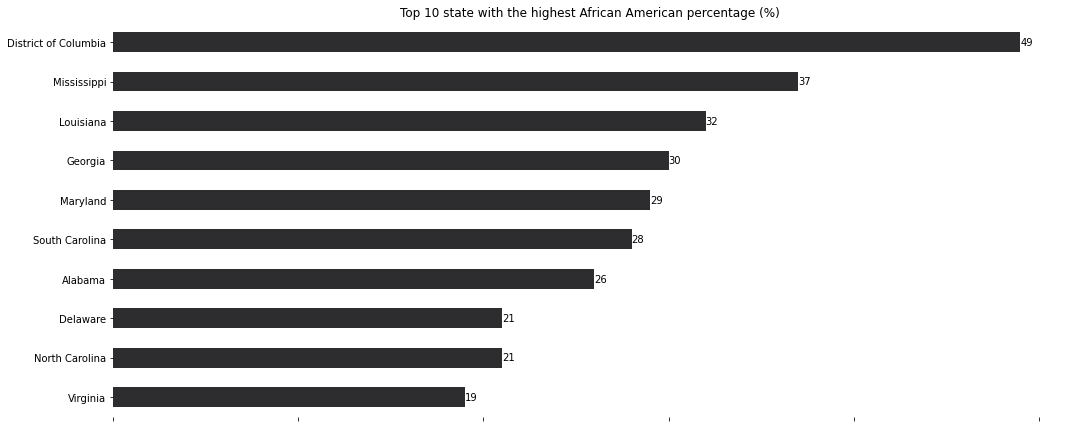

In [40]:
_ = (df.groupby('state')['percent_black'].sum().sort_values(ascending=True)[-10:]).plot(kind='barh', figsize=(15,6), color='#2d2d30')
_.bar_label(_.containers[0]);
_.tick_params(axis='x', rotation=0)
_.set_title('Top 10 state with the highest African American percentage (%)');
_.set_frame_on(False)
_.set_xticklabels('')
_.set_ylabel('')
plt.tight_layout()

Interestingly, `District of Columbia` is the state with the highest african american percentage with **49**%, and followed by `Mississippi` with **37**% and `Louisiana` with **32**%

## 8. Conclusion

Before we jump into the conclusion, it is crucial to be aware of the data that we are dealing with. Our data is talking about the USA states demographic, and also price and consumption of cannabis in The USA. From the data analysis and calculation that has been done, we got some insights that we can share.

First and foremost, let's talk about the cannabis legality in The USA. basically there are 3 types of legality in The USA: Fully legal, legal for medical purposes and fully illegal. We discovered that, there are **16** states that fully legalize cannabis , **29** states that legalize for medical purposes only, and **6** states that have not legalized cannabis yet. For the cannabis itself, there are 3 types of cannabis quality that are sold openly: high, medium and low. Since our company are focusing on medium or higher cannabis quality, so we only look at the price of those 2 qualities. Based on our findings, averagely the price of high quality cannabis is USD **324.098** per ounce and USD **258.392** per ounce for the medium quality. Specifically for the state, the state that sells high quality cannabis with the most expensive price is `District of Columbia` with USD **528** per ounce which way higher than the average, on the contrary the most expensive medium quality cannabis is sold in `South Dakota` with USD **336** per ounce. On the other hand, `Oregon` sells their high quality with lowest price there is at USD **210** per ounce, and for medium quality, it is `Mississippi` with USD **172** per ounce. Another interesting case that might pique your interest is whether there is any correlation between cannabis price and it's legality, seemingly there is no correlation between cannabis price and it's legality based on the test that we have conducted.

Moving on to our goal which is to build a new store. To do such a thing, finding the most suitable state is a must and based on our analysis, we figured out that `California` (**37.6** mil), `Texas` (**25.6** mil) and `New York` (**19.4** mil) are the states with the highest population. Not to mention income per capita, `District of Columbia`(USD 45290) is the highest, followed by `Connecticut`(USD 37892) and `Maryland`(USD 36027). Talking about the consumption of cannabis, `District of Columbia` (**21.08**%) is state with the highest consumption, the next in line is `Alaska` (**21.08**%) and `Rhode Island` (**20.01%**%). Demography of people is also important for our decision, unsuprisingly Caucasian (**73.5**%) is the dominant race in The USA, followed by the African American (**11.3**%), Hispanic (**11.3**%) and lastly Asian (**3.9**%), but since we are focusing our market on african american people, so it is necessary to find the african american percentage in each state, apparently, `District of Columbia` (**49**%) is the state with the highest african american percentage, followed by `Mississippi` (**37**%) and `Louisiana` (**32**%).

To sum it up, we suggest that we should expand to `District of Columbia` due to the fact that state has the most expensive price for high quality cannabis, highest consumption of cannabis, highest income per capita, and highest percentage of african american which is our main market target. 











    